In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy import stats

try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from main.draw_tools.stacking_with_error_bars import MC_stack_plot, MC_stack_plot_density

from main.data_tools.error_bars import make_data_weight
from main.data_tools.query_dataframes import cut_dfs_7types , cut_dfs_generic_Vpi0eta

Welcome to JupyROOT 6.26/04


# DRAW with respect to generic bkg

In [2]:
base_file_loc = '/media/jykim/T7/storage/Ntuples_ghi/Generic_Ntuples/ref_pre_ref_only_skim/'


phigamma_ccbar = base_file_loc + 'ccbar/recon_*.root'
# phigamma_ccbar = base_file_loc + 'topo/generic_ccbar.root'
# phigamma_ccbar = base_file_loc + 'topo/resultfile/result_phi/standard.root'

phigamma_uubar = base_file_loc + 'uubar/recon_*.root'
phigamma_ddbar = base_file_loc + 'ddbar/recon_*.root'
phigamma_ssbar = base_file_loc + 'ssbar/recon_*.root'
phigamma_charged = base_file_loc + 'charged/recon_*.root'
phigamma_mixed = base_file_loc + 'mixed/recon_*.root'
phigamma_taupair = base_file_loc + 'taupair/recon_*.root'

In [3]:
# base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Rho_M - 0.77526 ) < 0.15 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'
base_filter=' D0_M>1.68 && D0_M<2.05'

variables=['D0_M','Dstarp_CMS_p','Dstarp_delM','Dstarp_isSignal']
#,'D0_cosHel_0','Dstarp_Q','Dstarp_CMS_p','gamma_E','gamma_genMotherPDG','Dstarp_isSignal','Dstarp_delM','Dstarp_flightDistance','Dstarp_flightDistanceErr','D0_flightDistance','D0_flightDistanceErr','Dstarp_chiProb']
# variables += ['dM_pi0_50MeV', 'dM_pi0_75MeV']

tree='ref_antiKstar'

In [4]:
pd_phigamma_ccbar = get_pd(file=phigamma_ccbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_uubar = get_pd(file=phigamma_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ddbar = get_pd(file=phigamma_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ssbar = get_pd(file=phigamma_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_charged = get_pd(file=phigamma_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_mixed = get_pd(file=phigamma_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_taupair = get_pd(file=phigamma_taupair, tree=tree,base_filter=base_filter,variables=variables)

In [48]:
pd_ccbar = pd_phigamma_ccbar.reset_index(drop=True)
pd_uubar = pd_phigamma_uubar.reset_index(drop=True)
pd_ddbar = pd_phigamma_ddbar.reset_index(drop=True)
pd_ssbar = pd_phigamma_ssbar.reset_index(drop=True)
pd_charged = pd_phigamma_charged.reset_index(drop=True)
pd_mixed = pd_phigamma_mixed.reset_index(drop=True)
pd_taupair = pd_phigamma_taupair.reset_index(drop=True)

[ 83401.  67897.  56124.  51446.  54240.  47000.  32751.  22891.  21265.
  21259.  21487.  21410.  22107.  22586.  22407.  20727.  20065.  20476.
  21430.  23166.  25770.  31766.  48916. 156580. 987958. 933195. 115684.
  31638.  20730.  17188.  15456.  14093.  13696.  13683.  13329.  13115.
  12577.  12170.  11861.  11665.  11523.  11387.  10952.  10934.  10734.
  10479.  10314.  10052.   9857.   9697.]
fitst_bin_entries=83401.0


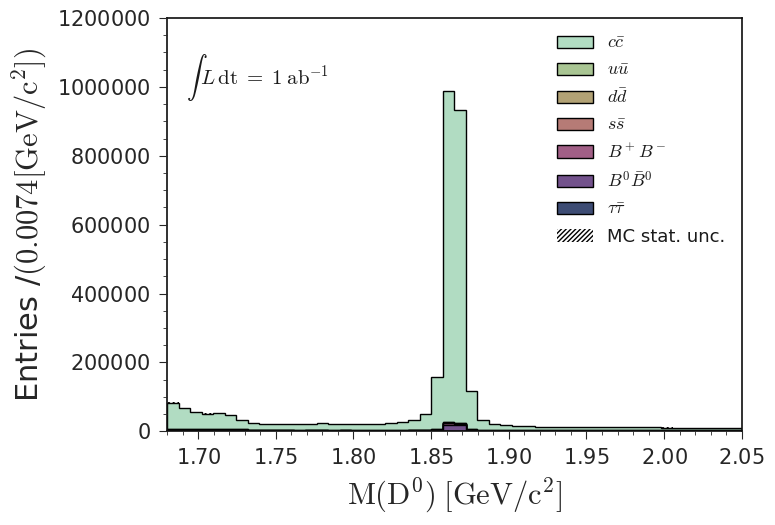

In [49]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']
var = 'D0_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
scale = 1
xrange = (1.68,2.05)
# xrange = (1.8,1.9)
# xrange = (1.75,2.0)

cut_level = 'pre'

nbins = 50
xlabel = "$\mathrm{M(D^0)}$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]",ncol=1,luminosity='$1\\; \\mathrm{ab}^{-1}$')

plt.tight_layout()
# plt.savefig("/media/jykim/T7/saved_plots/references/ref_rho/cut230828_pre_D0_M.png")
plt.savefig("/media/jykim/T7/saved_plots/references/" + tree + "/cut230828_" + cut_level + "_D0_M.png")

In [60]:
cut = 'gamma_E>0.0'
cut = 'dM_pi0_75MeV  > 0.023'
cut = 'D0_M>0.0'
# cut = 'abs((Dstarp_delM-0.1455))<0.0006 & Dstarp_CMS_p>2.5'
cut = 'abs((Dstarp_delM-0.1455))<0.00075 '
cut = 'abs((Dstarp_delM-0.1455))<0.00075 & Dstarp_CMS_p>2.5'

# cut = 'abs(Phi_M - 1.0195) < 0.011 & abs(Dstarp_delM-(2.0103-1.8648))<0.001  '
pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

In [61]:
cut_level="pre"
cut_level="delMcut"
cut_level="delMcut_DstarCMSpcut"


[  1089.   1189.   1239.   1390.   1521.   1621.   1748.   1995.   2331.
   2523.   2816.   3406.   3951.   4639.   5688.   7338.   9737.  14268.
  22937.  44803. 101739. 228648. 390587. 425753. 284540. 127781.  48158.
  19725.  10283.   6264.   4269.   2996.   2435.   1824.   1555.   1268.
   1063.    945.    854.    688.    590.    567.    546.    507.    495.
    531.    505.    487.    507.    539.]
fitst_bin_entries=1089.0


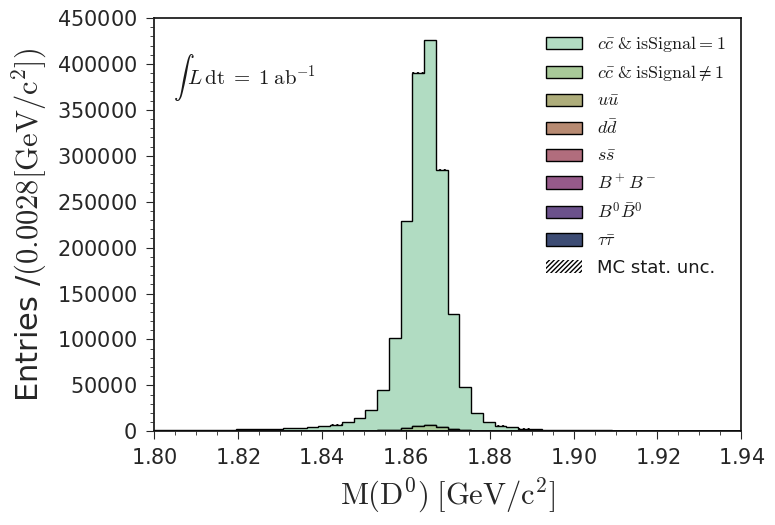

In [65]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c} \; & \;  \mathrm{isSignal}\neq 1$', r'$c\bar{c} \; & \; \mathrm{isSignal}=1$']
var = 'D0_M'
pd_signal = pd_ccbar.query('Dstarp_isSignal==1')
pd_notsignal = pd_ccbar.query('Dstarp_isSignal!=1')

data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_notsignal[var], pd_signal[var]]  
scale = 1
# xrange = (1.68,2.05)
xrange = (1.8,1.94)


nbins = 50
xlabel = "$\mathrm{M(D^0)}$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]",luminosity='$1\\; \\mathrm{ab}^{-1}$', ncol=1)

plt.tight_layout()

# plt.savefig("/media/jykim/T7/saved_plots/references/" + tree + "/cut230828_" + cut_level + "_D0_M.png")
plt.savefig("/media/jykim/T7/saved_plots/references/" + tree + "/cut230828_" + cut_level + "_D0_M_narrow_range.png")

# plt.savefig("/media/jykim/T7/saved_plots/references/ref_rho/cut230828_pre_D0_M.png")
# plt.savefig("/media/jykim/T7/saved_plots/references/ref_rho/cut230828_delMcut_D0_M_narrow_range.png")
# plt.savefig("/media/jykim/T7/saved_plots/references/ref_rho/cut230828_delMcut_DstarCMSpcut_D0_M_narrow_range.png")

[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 3.9364e+04 6.0344e+04 6.2194e+04 6.3519e+04
 6.4614e+04 6.5901e+04 6.6652e+04 6.7453e+04 6.7333e+04 6.6936e+04
 6.6382e+04 6.6796e+04 6.5599e+04 6.5368e+04 6.4118e+04 6.2865e+04
 6.1365e+04 5.9887e+04 5.8450e+04 5.6721e+04 5.5111e+04 5.3312e+04
 5.0796e+04 4.9210e+04 4.7228e+04 4.4723e+04 4.2345e+04 4.0011e+04
 3.8172e+04 3.5748e+04 3.3304e+04 3.0845e+04 2.7868e+04 2.5140e+04
 2.2452e+04 1.9650e+04 1.6753e+04 1.2602e+04 8.4710e+03 3.6980e+03
 3.5900e+02 2.2000e+01]
fitst_bin_entries=0.0


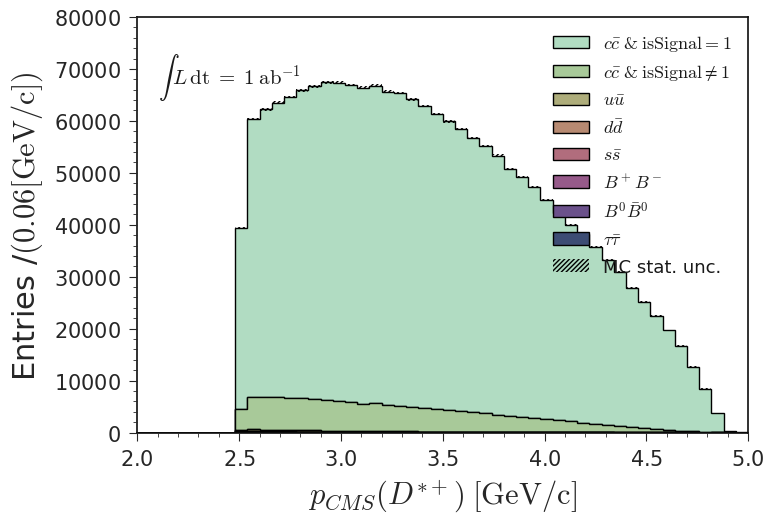

In [63]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c} \; & \;  \mathrm{isSignal}\neq 1$', r'$c\bar{c} \; & \; \mathrm{isSignal}=1$']
var = 'Dstarp_CMS_p'
pd_signal = pd_ccbar.query('Dstarp_isSignal==1')
pd_notsignal = pd_ccbar.query('Dstarp_isSignal!=1')

data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_notsignal[var], pd_signal[var]]  
scale = 1
xrange = (2, 5)
# xrange = (1.8,1.9)

nbins = 50
xlabel = "$p_{CMS}(D^{*+})$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c]",luminosity='$1\\; \\mathrm{ab}^{-1}$',ncol=1,force_range=xrange)
plt.tight_layout()
# plt.savefig("/media/jykim/T7/saved_plots/references/ref_rho/cut230828_pre_Dstarp_CMS_p.png")
# plt.savefig("/media/jykim/T7/saved_plots/references/ref_rho/cut230828_delMcut_Dstarp_CMS_p.png")
# plt.savefig("/media/jykim/T7/saved_plots/references/ref_rho/cut230828_delMcut_DstarCMSpcut_Dstarp_CMS_p.png")


plt.savefig("/media/jykim/T7/saved_plots/references/" + tree + "/cut230828_" + cut_level + "_Dstarp_CMS_p.png")


[      0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.   72262. 1166840.  617383.   53228.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.]
fitst_bin_entries=0.0


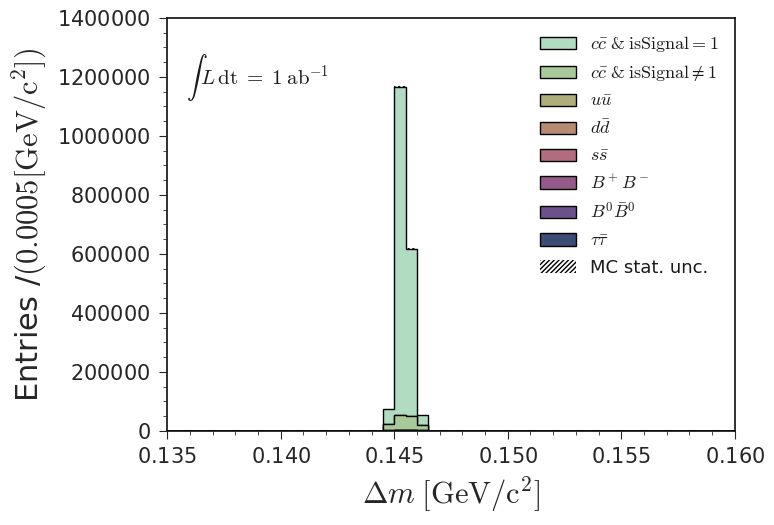

In [64]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c} \; & \;  \mathrm{isSignal}\neq 1$', r'$c\bar{c} \; & \; \mathrm{isSignal}=1$']
var = 'Dstarp_delM'
pd_signal = pd_ccbar.query('Dstarp_isSignal==1')
pd_notsignal = pd_ccbar.query('Dstarp_isSignal!=1')

data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_notsignal[var], pd_signal[var]]  
scale = 1
xrange = (0.135,0.16)
# xrange = (1.8,1.9)

nbins = 50
xlabel = "$\Delta m$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]",luminosity='$1\\; \\mathrm{ab}^{-1}$', force_range=xrange,  ncol=1)
plt.tight_layout()
# plt.savefig("/media/jykim/T7/saved_plots/references/ref_rho/cut230828_pre_Dstarp_delM.png")

plt.savefig("/media/jykim/T7/saved_plots/references/" + tree + "/cut230828_" + cut_level + "_Dstarp_delM.png")


[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 4.054000e+03
 8.446000e+03 1.125100e+04 1.315500e+04 1.535800e+04 1.807900e+04
 2.222800e+04 3.296500e+04 4.813500e+04 6.871500e+04 1.406620e+05
 1.364892e+06 7.251910e+05 1.128930e+05 6.355700e+04 4.754400e+04
 3.869800e+04 3.046900e+04 2.559800e+04 2.403800e+04 2.326300e+04
 2.272800e+04 2.280300e+04 2.244000e+04 2.236900e+04 2.249600e+04
 2.234200e+04 2.231500e+04 2.256000e+04 2.208900e+04 2.204100e+04
 2.229500e+04 2.212800e+04 2.224800e+04 2.221500e+04 2.196800e+04
 2.170600e+04 2.110700e+04 2.031100e+04 1.808600e+04 1.355100e+04]
fitst_bin_entries=0.0


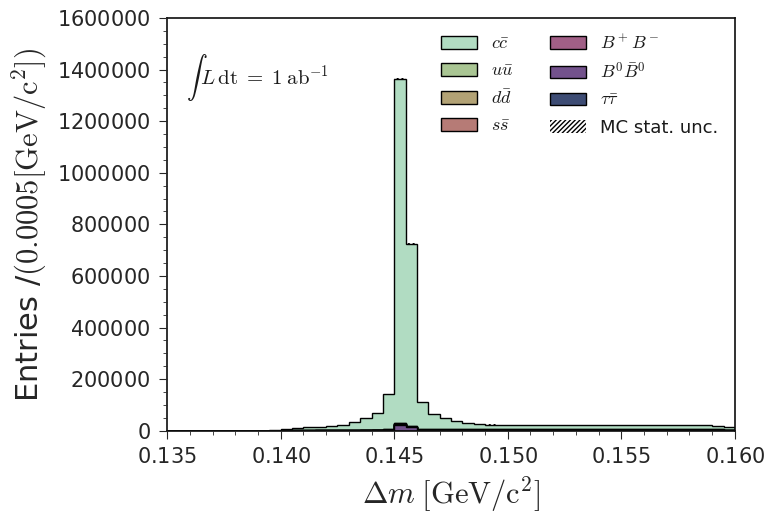

In [13]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']
var = 'Dstarp_delM'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
scale = 1
xrange = (0.135,0.16)
# xrange = (1.8,1.9)

nbins = 50
xlabel = "$\Delta m$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]",luminosity='$1\\; \\mathrm{ab}^{-1}$' , force_range=xrange)